# Introduction

===================================================================================================================

Name : Ardiansyah Putra Mahadika

Batch : BSD - 006


This program is developed in order to classify of sentiment analysis on twitter regarding cyber bullying by using Natural Language Processing algorithm. Metric score that used in this program is accuracy due to balance dataset and it is ease to ease to interpret. The dataset is retrieved from kaggle.com (https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data)

===================================================================================================================


## Background

Analyzing how people feel on Twitter about cyber bullying is important because Twitter is widely used for online conversations. Twitter gives us lots of real-time information, so we can quickly see trends related to cyber bullying. This helps us understand how the public reacts and feels about these issues, finding out who's affected and who's causing problems online. Also, sentiment analysis shows us the emotional impact on victims and the community, helping us track how people's opinions change over time. Using this information, we can create effective solutions and actions to fight cyber bullying and make the internet safer.

## Objective

The objective is to develop a Natural Language Processing (NLP) program aimed at achieving at least a 70% accuracy score in sentiment analysis. To accomplish this goal within a 5-day timeframe, we will focus on preparing, cleaning, and performing feature engineering on the data as part of our preprocessing steps. This approach is crucial as it allows us to understand the emotional impact of cyber bullying on victims and the broader community, enabling us to monitor shifts in public sentiment over time. By leveraging these insights, I aim to create a robust model that accurately assesses sentiment, contributing to efforts in combating cyber bullying and fostering a safer online environment.

# Import Libraries

In [ ]:
!pip install emoji -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 9.0 MB/s eta 0:00:00


In [ ]:
# Import Libraries

import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub

from wordcloud import WordCloud, STOPWORDS
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, LSTM, Bidirectional, GRU, Dropout, Reshape, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.probability import FreqDist


import pickle


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Data Loading

In [ ]:
# Retrieving Data

data = pd.read_csv('cyberbullying_tweets.csv')
data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [ ]:
# checking dimensionality of dataset
data.shape

(47692, 2)

In [ ]:
# Display the first few rows of the dataframe
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
# checking distribution of classes
data['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [ ]:
# Check for missing values
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

# EDA

In [ ]:
data.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

<ipython-input-10-0b6fc8605137>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='cyberbullying_type', palette="viridis")


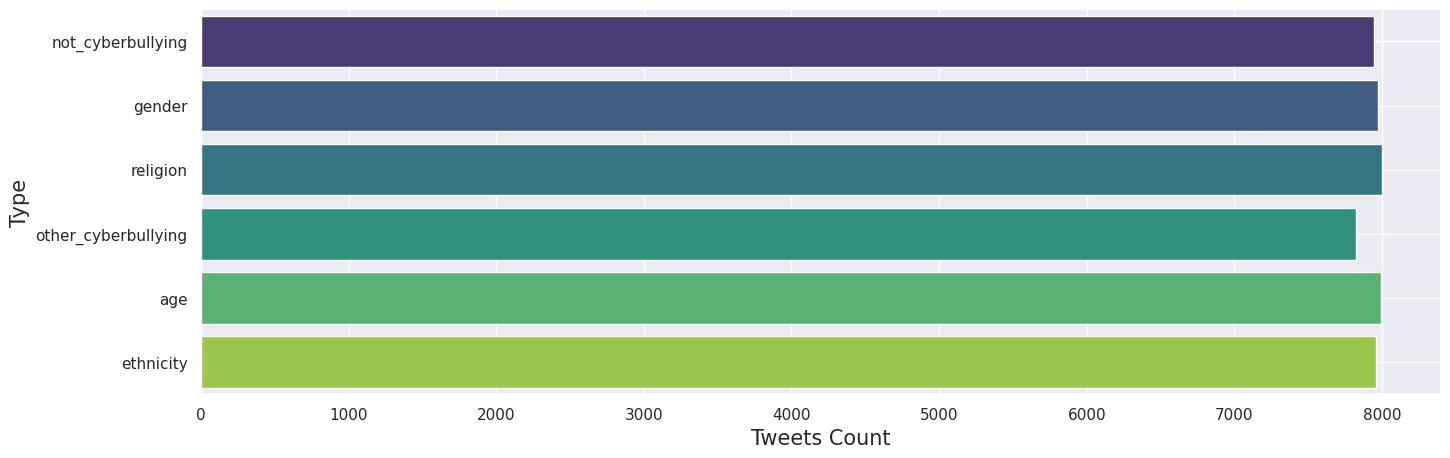

In [ ]:
sns.set_theme()
plt.figure(figsize=(16, 5))
ax = sns.countplot(data=data, y='cyberbullying_type', palette="viridis")
plt.xlabel('Tweets Count', size=15)
plt.ylabel('Type', size=15)
plt.grid(color='w')

__Insight:__

- The distribution data in dataset is relatively normally distributed which means the dataset has balanced data

# Feature Engineering

## Text Preprocessing

### Cleaning text

In [ ]:
# Update STOPWORDS
txt_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

STOPWORDS.update(['rt',
                  'mkr',
                  'didn',
                  'bc',
                  'n',
                  'm',
                  'im',
                  'll',
                  'y',
                  've',
                  'u',
                  'ur',
                  'don',
                  't',
                  's',
                  'gt',
                  'p',
                  'ta',
                  'pvp',
                  'manag',
                  'kat',
                  're',
                  'co',
                  'wa',
                  'https'])

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs, mentions, and non-alphanumeric characters
    txt_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub(txt_cleaning_re, ' ', text)

    # Remove emojis
    text = emoji.replace_emoji(text, replace="")

    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in STOPWORDS])

    # Remove /r, /n characters, non-utf characters, numbers, and punctuations
    text = text.replace('\r', '').replace('\n', ' ')
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub('[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove additional stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])

    # Remove contractions
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # Clean hashtags
    text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text))
    text = " ".join(word.strip() for word in re.split('#|_', text))

    # Filter special characters
    text = " ".join(['' if ('$' in word) | ('&' in word) else word for word in text.split()])

    # Remove multiple spaces
    text = re.sub("\s\s+" , " ", text)

    return text


In [ ]:
# Checking function
sample_text = "Check out this link: https://example.com @user #hashtag 😂"
cleaned_text = clean_text(sample_text)
print(cleaned_text)

check link user hashtag


In [ ]:
data.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [ ]:
# Applying Text Preprocessing to the Dataset

data['processed_text'] = data['tweet_text'].apply(lambda x: clean_text(x))

In [ ]:
data

,tweet_text,cyberbullying_type,processed_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account islam ...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expected anything depended anything ...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck therealexel youre nigger fucking unfo...


### Target Conversion

In [ ]:
data.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()

# encode the labels (classes)
data['label'] = label_encoder.fit_transform(data['cyberbullying_type'])


In [ ]:
data['label'].value_counts()

label
5    7998
0    7992
2    7973
1    7961
3    7945
4    7823
Name: count, dtype: int64

In [ ]:
label_encoder.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [ ]:
data

,tweet_text,cyberbullying_type,processed_text,label
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account islam ...,3
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expected anything depended anything ...,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck therealexel youre nigger fucking unfo...,1


### Handling duplicated data

In [ ]:
# Handling duplicates
data["processed_text"].duplicated().sum()

2875

In [ ]:
# Removing duplicates
data.drop_duplicates("processed_text", inplace=True)

### Tokenization

In [ ]:
data['list_of_tweets'] = data['processed_text'].apply(word_tokenize)
data.head()

,tweet_text,cyberbullying_type,processed_text,label,list_of_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious,3,"[words, katandandre, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...,3,"[aussietv, white, theblock, imacelebrityau, to..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,3,"[classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...,3,"[meh, thanks, heads, concerned, another, angry..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account islam ...,3,"[isis, account, pretending, kurdish, account, ..."


In [ ]:
data['label'].value_counts()

label
5    7956
0    7881
1    7792
3    7691
2    7646
4    5851
Name: count, dtype: int64

In [ ]:
# define length of tweet per word
text_length = []
for text in data.list_of_tweets:
    tweet_length = len(text)
    text_length.append(tweet_length)
data['text_len'] = text_length
data = data[data['text_len']!=0]
data

,tweet_text,cyberbullying_type,processed_text,label,list_of_tweets,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious,3,"[words, katandandre, food, crapilicious]",4
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...,3,"[aussietv, white, theblock, imacelebrityau, to...",10
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,3,"[classy, whore, red, velvet, cupcakes]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...,3,"[meh, thanks, heads, concerned, another, angry...",8
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account islam ...,3,"[isis, account, pretending, kurdish, account, ...",7
...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expected anything depended anything ...,1,"[black, ppl, expected, anything, depended, any...",21
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,1,"[turner, withhold, disappointment, turner, cal...",29
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,1,"[swear, god, dumb, nigger, bitch, got, bleach,...",13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck therealexel youre nigger fucking unfo...,1,"[yea, fuck, therealexel, youre, nigger, fuckin...",10


### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatizer_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data['processed_text'] = data['processed_text'].apply(lambda text: lemmatizer_words(text))

<ipython-input-26-1c060a51449f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['processed_text'].apply(lambda text: lemmatizer_words(text))


In [ ]:
data.head()

,tweet_text,cyberbullying_type,processed_text,label,list_of_tweets,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious,3,"[words, katandandre, food, crapilicious]",4
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...,3,"[aussietv, white, theblock, imacelebrityau, to...",10
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,3,"[classy, whore, red, velvet, cupcakes]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,3,"[meh, thanks, heads, concerned, another, angry...",8
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account islam lie,3,"[isis, account, pretending, kurdish, account, ...",7


# EDA after cleaning text

In [ ]:
label_encoder.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

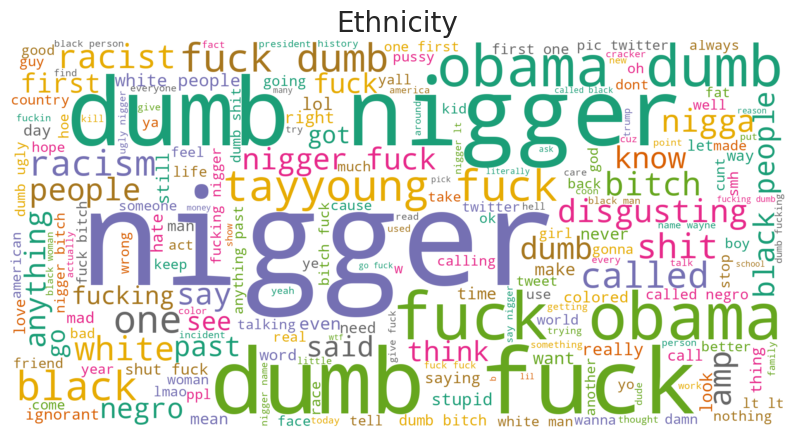

In [ ]:
# Ethnicity
plt.figure(figsize=(10, 10))
subset1 = data[data['label']==1]
text_ethnicity = subset1['processed_text'].values
wc1 = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(' '.join(text_ethnicity))

plt.axis('off')
plt.title("Ethnicity", fontsize=20)
plt.imshow(wc1, interpolation='bilinear')

__Insight__:

The word 'nigger' appears most prominently in the visualization above, following the "black" and "obama" word. This suggests that the use of the kind of word often directed at black people, is very frequent

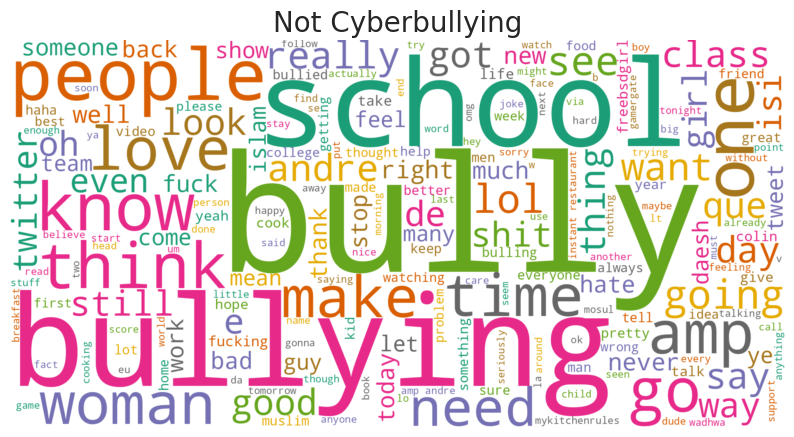

In [ ]:
# Not Bullying
plt.figure(figsize=(10, 10))
subset2 = data[data['label']==3]
text_notbully = subset2['processed_text'].values
wc1 = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(' '.join(text_notbully))

plt.axis('off')
plt.title("Not Cyberbullying", fontsize=20)
plt.imshow(wc1, interpolation='bilinear')

__Insight__:

The word 'bully' itself is classified under 'not bullying'. This suggests that people are also complaining about bullying within society, especially in the twitter

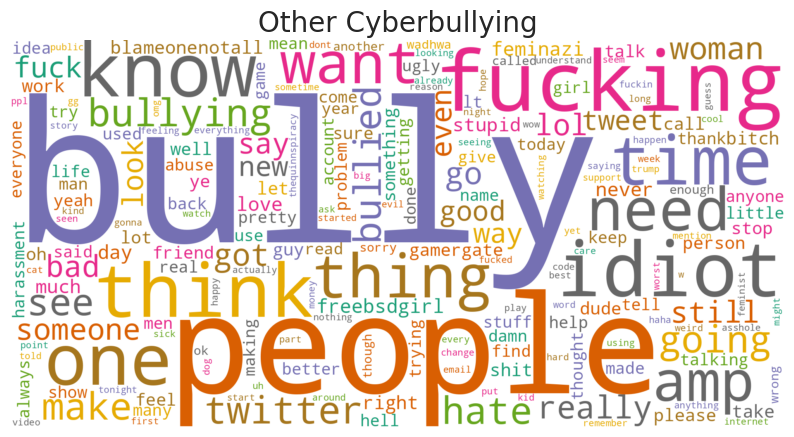

In [ ]:
# Not Bullying
plt.figure(figsize=(10, 10))
subset3 = data[data['label']==4]
text_otherbully = subset3['processed_text'].values
wc1 = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(' '.join(text_otherbully))

plt.axis('off')
plt.title("Other Cyberbullying", fontsize=20)
plt.imshow(wc1, interpolation='bilinear')

__Insight__:

In the 'other bullying' class, there are very random words, but 'bully' can be seen. People use words like 'idiot,' 'fuck,' and other bad words

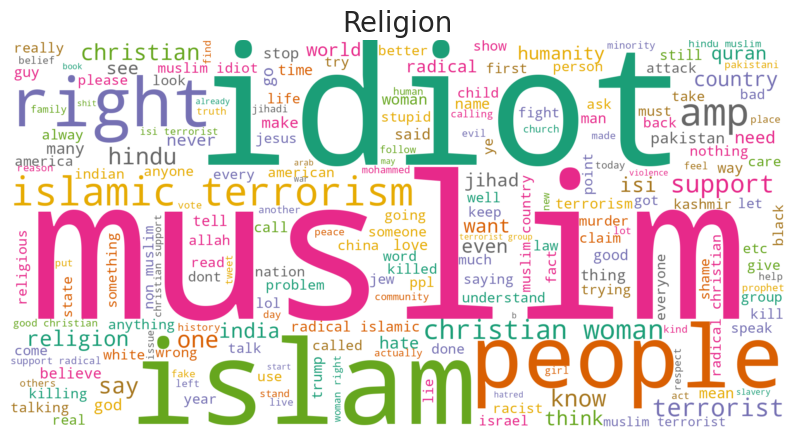

In [ ]:
# Religion
plt.figure(figsize=(10, 10))
subset4 = data[data['label']==5]
text_religion = subset4['processed_text'].values
wc1 = WordCloud(background_color='white', colormap='Dark2', width=2000, height=1000).generate(' '.join(text_religion))

plt.axis('off')
plt.title("Religion", fontsize=20)
plt.imshow(wc1, interpolation='bilinear')

__Insight:__

From the most frequent words that appear, we can infer that in the 'religion' class, bullying is dominated by accusations directed at one religion associated with terrorism (referring to the frequent words).

## Splitting Data

In [ ]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(data.processed_text,
                                                    data.label,
                                                    test_size=0.3,
                                                    random_state=54,
                                                    stratify=data.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.25,
                                                  random_state=54,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (23528,)
Val Size   :  (7843,)
Test Size  :  (13445,)


In [ ]:
# Change Target to One Hot Encoding

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

# Model Definition

## Text Vectorize

In [ ]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<23528x30583 sparse matrix of type '<class 'numpy.int64'>'
	with 284639 stored elements in Compressed Sparse Row format>

In [ ]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  30583
Maximum Sentence Length :  360 tokens


In [ ]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [ ]:
# Example Result

## Document example
print('Document example')
print(data.processed_text[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([data.processed_text[0]]))
print('Vector size : ', text_vectorization([data.processed_text[0]]).shape)

Document example
word katandandre food crapilicious

Result of Text Vectorization
tf.Tensor(
[[  82 2125  566    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  

In [ ]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'school',
 'fuck',
 'nigger',
 'girl',
 'joke',
 'bully',
 'high',
 'dumb',
 'muslim',
 'people',
 'bullied',
 'gay',
 'rape',
 'one',
 'idiot',
 'woman',
 'black',
 'amp']

## Word Embedding

In [ ]:
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [ ]:
# Example Result

## Document example
print('Document example')
print(data.processed_text[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([data.processed_text[0]]))
print('Vector size : ', text_vectorization([data.processed_text[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([data.processed_text[0]])))
print('Vector size : ', embedding(text_vectorization([data.processed_text[0]])).shape)

Document example
word katandandre food crapilicious

Result of  Text Vectorization
tf.Tensor(
[[  82 2125  566    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0 

## LSTM

In [ ]:
# Model Training using LSTM
# %%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)

model_lstm_1.add(Bidirectional(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(BatchNormalization())
model_lstm_1.add(Dropout(0.25))

model_lstm_1.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(BatchNormalization())
model_lstm_1.add(Dropout(0.25))

model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(BatchNormalization())
model_lstm_1.add(Dropout(0.25))

model_lstm_1.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(BatchNormalization())
model_lstm_1.add(Dropout(0.25))

model_lstm_1.add(Dense(6, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 360)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 360, 128)          3914624   
                                                                 
 bidirectional (Bidirection  (None, 360, 256)          263168    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 360, 256)          1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 360, 256)          0         
                                                        

__Analysis__:

- There are 4 hidden layer and an output layer

- Text Vectorization stands for transforming text into numbers that a model can understand, so the model can process text as input

- Embedding used to create richer and more meaningful vector representations of words

- The softmax activation function is used in the output layer of multi-class classification models

- Bidirectional LSTM allows the LSTM to capture context from both past and future directions in sequences, enhancing its ability to understand sequential data

- return_sequences=True: ensuring its outputs results for every timestep in the sequence, which is essential for subsequent recurrent layers

- using Glorot to initialize the LSTM weights using Glorot uniform

- BatchNormalization: Normalizes the output of the LSTM layer to stabilize and improve training performance, reducing the internal covariate shift and dependencies on input scale and distribution

- Dropout 0.25: Randomly ignores 25% of units during training after Batch Normalization, which prevents overfitting by forcing the model to learn more robust features and reducing dependencies on each unit

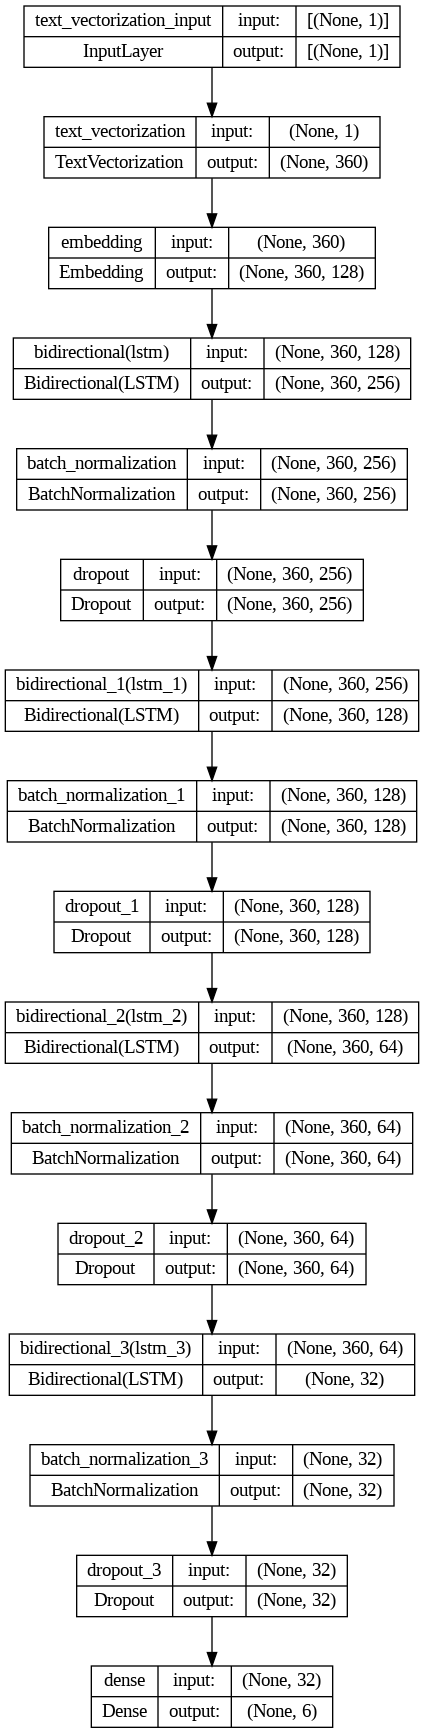

In [ ]:
tf.keras.utils.plot_model(model_lstm_1, show_shapes=True)

## callbacks

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)


These callbacks are used to optimize training by stopping early when the model stops improving (EarlyStopping) and by dynamically adjusting the learning rate when validation loss plateaus (ReduceLROnPlateau), thereby potentially improving model performance and convergence.

# Model Training

In [ ]:
y_train_ohe.shape

(23528, 6)

In [ ]:
model_lstm_1_hist = model_lstm_1.fit(X_train,
                                     y_train_ohe,
                                     epochs=100,
                                     batch_size=256,
                                     callbacks=[early_stopping, reduce_lr],
                                     validation_data=(X_val, y_val_ohe))

Epoch 1/100
92/92 [==============================] - 49s 351ms/step - loss: 1.4882 - accuracy: 0.4639 - val_loss: 1.7001 - val_accuracy: 0.2963 - lr: 0.0010
Epoch 2/100
92/92 [==============================] - 26s 280ms/step - loss: 0.5697 - accuracy: 0.7826 - val_loss: 1.4143 - val_accuracy: 0.4631 - lr: 0.0010
Epoch 3/100
92/92 [==============================] - 24s 266ms/step - loss: 0.4139 - accuracy: 0.8375 - val_loss: 1.0700 - val_accuracy: 0.6003 - lr: 0.0010
Epoch 4/100
92/92 [==============================] - 25s 273ms/step - loss: 0.3016 - accuracy: 0.8946 - val_loss: 1.3263 - val_accuracy: 0.4971 - lr: 0.0010
Epoch 5/100
92/92 [==============================] - 24s 265ms/step - loss: 0.2159 - accuracy: 0.9358 - val_loss: 0.5743 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 6/100
92/92 [==============================] - 23s 253ms/step - loss: 0.1614 - accuracy: 0.9556 - val_loss: 0.8575 - val_accuracy: 0.7586 - lr: 0.0010
Epoch 7/100
92/92 [==============================] - 23s 2

__Insights:__

Loss and Accuracy:

- The training loss (0.0355) indicates how well or poorly the model predicts the target values during training. Lower loss values indicate better prediction performance.

- Training accuracy (0.9938) reflects the percentage of correctly predicted classes in the training data.


Validation Loss and Validation Accuracy:

- Validation loss (0.9939) is the loss value on the validation data, indicating how well the model predicts the target values on data not used during training. Lower validation loss values indicate better generalization ability of the model on new data.

- Validation accuracy (0.8099) reflects the percentage of correctly predicted classes in the validation data.

# Model Evaluation

In [ ]:
history_functional_df = pd.DataFrame(model_lstm_1_hist.history)
history_functional_df


,loss,accuracy,val_loss,val_accuracy,lr
0,1.488200,0.463915,1.700149,0.296315,0.001000
1,0.569741,0.782557,1.414277,0.463088,0.001000
2,0.413902,0.837513,1.069991,0.600281,0.001000
3,0.301621,0.894636,1.326325,0.497131,0.001000
4,0.215872,0.935821,0.574285,0.782609,0.001000
5,0.161401,0.955585,0.857474,0.758638,0.001000
6,0.127704,0.965573,0.714839,0.800842,0.001000
7,0.095350,0.976581,0.765892,0.808874,0.000500
8,0.071635,0.984147,0.864050,0.805049,0.000500
9,0.059331,0.988142,0.869884,0.809002,0.000250


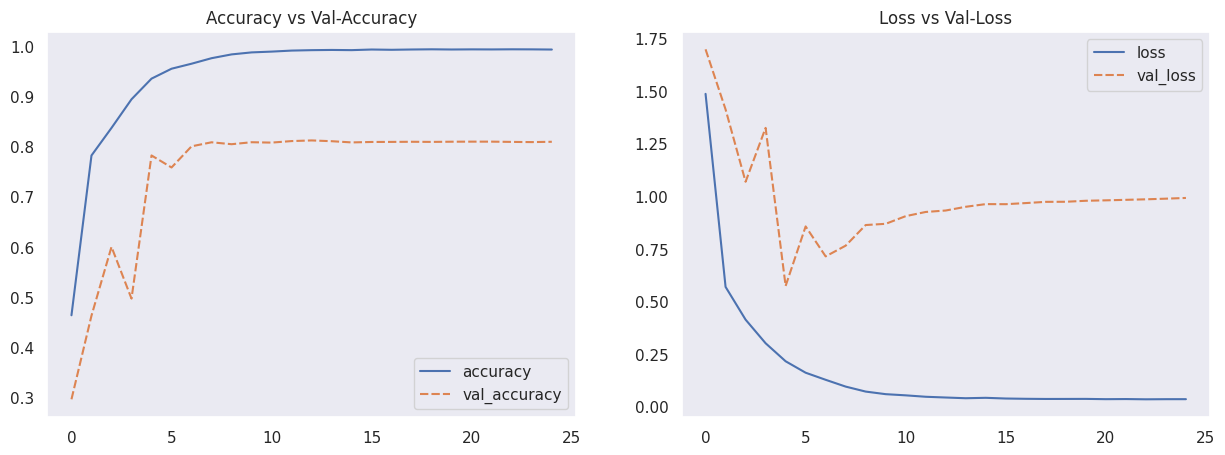

In [ ]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

__Analysis__:

- The model shows signs of overfitting as there is a significant difference between the accuracy on the training data (0.9938) and the validation data (0.8099), as well as a large difference between the training loss (0.0355) and the validation loss (0.9939).

- Further evaluation of the model is needed to improve on validation data. This could involve adjusting the model architecture (number of hidden layer), using regularization techniques, or improving data collection methods.

In [ ]:
# Model Evaluation

y_pred_lstm_1 = model_lstm_1.predict(X_test)
y_pred_lstm_1


421/421 [==============================] - 18s 37ms/step


array([[1.7298621e-03, 1.1574421e-03, 9.3308347e-01, 4.2518498e-03,
        5.7018533e-02, 2.7589020e-03],
       [6.2784515e-03, 5.8517978e-03, 4.3338764e-02, 3.7913233e-01,
        5.6164587e-01, 3.7527760e-03],
       [1.5365115e-03, 1.0351146e-03, 2.1219414e-03, 9.4331127e-01,
        4.5073520e-02, 6.9215624e-03],
       ...,
       [4.4080173e-03, 3.4485243e-03, 1.3054428e-02, 7.2241205e-01,
        2.5326660e-01, 3.4103503e-03],
       [1.3004751e-03, 9.9501389e-01, 1.0863399e-03, 3.0327993e-04,
        8.4905245e-04, 1.4469905e-03],
       [7.9183951e-03, 1.3999241e-02, 2.7358083e-02, 4.0307829e-01,
        5.4424250e-01, 3.4034981e-03]], dtype=float32)

In [ ]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
# Probability for each class

y_pred_df = pd.DataFrame(y_pred_lstm_1, columns=data['cyberbullying_type'].unique())
y_pred_df


,not_cyberbullying,gender,religion,other_cyberbullying,age,ethnicity
0,0.001730,0.001157,0.933083,0.004252,0.057019,0.002759
1,0.006278,0.005852,0.043339,0.379132,0.561646,0.003753
2,0.001537,0.001035,0.002122,0.943311,0.045074,0.006922
3,0.002331,0.994181,0.000734,0.000403,0.001047,0.001304
4,0.000812,0.000838,0.974630,0.002110,0.019532,0.002078
...,...,...,...,...,...,...
13440,0.001220,0.001626,0.960290,0.003252,0.029814,0.003798
13441,0.002036,0.001441,0.925060,0.004701,0.063134,0.003627
13442,0.004408,0.003449,0.013054,0.722412,0.253267,0.003410
13443,0.001300,0.995014,0.001086,0.000303,0.000849,0.001447


In [ ]:
class_names = data['cyberbullying_type'].unique()
class_names

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
# Get class prediction

y_pred_class = np.argmax(y_pred_lstm_1[13])
y_pred_class_name = class_names[np.argmax(y_pred_lstm_1[13])]

print('Prediction - Class       : ', y_pred_class)
print('Prediction - Class Name  : ', y_pred_class_name)

Prediction - Class       :  3
Prediction - Class Name  :  other_cyberbullying


## LSTMN with Transfer Learning

In [ ]:
# Download the Embedding Layer

url = "https://www.kaggle.com/models/google/nnlm/TensorFlow2/tf2-preview-en-dim128-with-normalization/1"

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

by using pretrained embeddings from TensorFlow Hub allows the model to improving effectiveness in natural language processing for sentiment analysis that rely on understanding word contexts.

In [ ]:
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))

model_lstm_2.add(Bidirectional(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Dropout(0.25))

model_lstm_2.add(Bidirectional(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Dropout(0.25))

model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Dropout(0.25))

model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(BatchNormalization())
model_lstm_2.add(Dropout(0.25))

model_lstm_2.add(Dense(6, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')


In [ ]:
# Training Model
model_lstm_2_hist = model_lstm_2.fit(X_train,
                                     y_train_ohe,
                                     epochs=200,
                                     batch_size=256,
                                     callbacks=[reduce_lr, early_stopping],
                                     validation_data=(X_val, y_val_ohe))

Epoch 1/200
92/92 [==============================] - 27s 130ms/step - loss: 1.4596 - accuracy: 0.4521 - val_loss: 1.8887 - val_accuracy: 0.1826 - lr: 0.0010
Epoch 2/200
92/92 [==============================] - 8s 91ms/step - loss: 1.1539 - accuracy: 0.5629 - val_loss: 2.1498 - val_accuracy: 0.1716 - lr: 0.0010
Epoch 3/200
92/92 [==============================] - 8s 87ms/step - loss: 1.0140 - accuracy: 0.6137 - val_loss: 2.3389 - val_accuracy: 0.1753 - lr: 0.0010
Epoch 4/200
92/92 [==============================] - 11s 119ms/step - loss: 0.9256 - accuracy: 0.6453 - val_loss: 2.6787 - val_accuracy: 0.1748 - lr: 5.0000e-04
Epoch 5/200
92/92 [==============================] - 9s 99ms/step - loss: 0.8881 - accuracy: 0.6554 - val_loss: 2.5877 - val_accuracy: 0.2083 - lr: 5.0000e-04
Epoch 6/200
92/92 [==============================] - 10s 106ms/step - loss: 0.8565 - accuracy: 0.6683 - val_loss: 1.7610 - val_accuracy: 0.3907 - lr: 2.5000e-04
Epoch 7/200
92/92 [==============================] -

__Insights:__

Loss and Accuracy:

- The training loss (0.6958) indicates the model's performance in terms of how well it predicts the target values during the training phase. A lower loss indicates better predictive performance

- Training accuracy (0.7238) reflects the percentage of correctly predicted classes in the training dataset

Validation Loss and Validation Accuracy:

- Validation loss (0.7019) represents how well the model predicts the target values on the validation dataset, which it hasn't seen during training. Lower validation loss values indicate better generalization of the model on new data

- Validation accuracy (0.7158) indicates the percentage of correctly predicted classes in the validation dataset

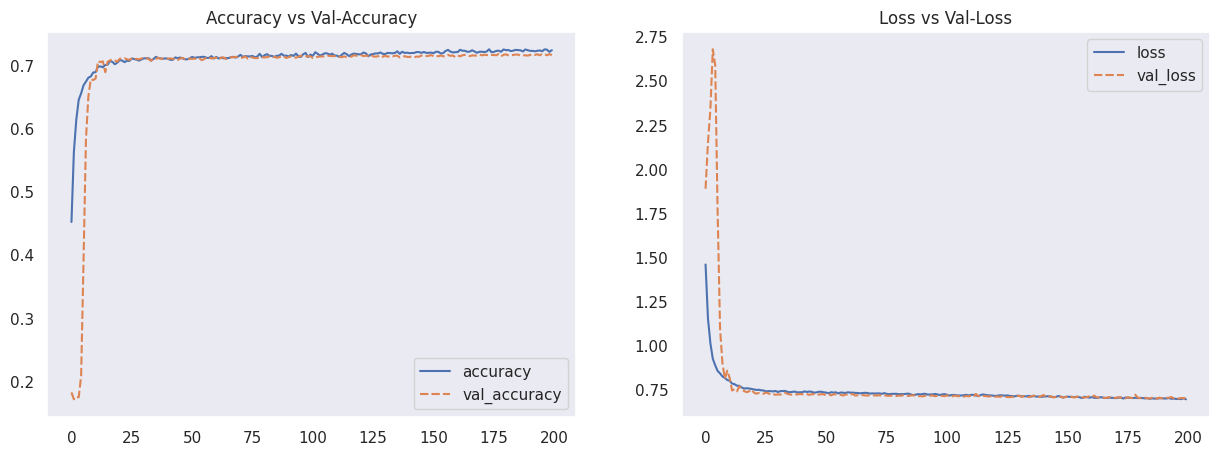

In [ ]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

__Analysis__:

- The model shows relatively balanced performance between training and validation datasets, with training accuracy (72.38%) slightly higher than validation accuracy (71.59%)

- Both training and validation losses are close, suggesting the model is not overfitting excessively (good fit model)

- While the model's accuracy is reasonable, further tuning or adjustments may be needed to improve validation accuracy and reduce loss, ensuring better generalization to unseen data

In [ ]:
y_pred_lstm_2 = model_lstm_2.predict(X_test)
y_pred_lstm_2


421/421 [==============================] - 10s 19ms/step


array([[0.01063297, 0.00418393, 0.94423765, 0.01775564, 0.02168583,
        0.00150403],
       [0.00942489, 0.00360606, 0.08309697, 0.57917905, 0.22671582,
        0.09797727],
       [0.0032666 , 0.00149171, 0.0144367 , 0.82257366, 0.15057065,
        0.00766072],
       ...,
       [0.00201032, 0.00231718, 0.24672373, 0.3989684 , 0.33961466,
        0.01036578],
       [0.00459794, 0.92425597, 0.00240241, 0.00119277, 0.00140936,
        0.06614163],
       [0.00507047, 0.0065996 , 0.03969973, 0.59557444, 0.33262458,
        0.02043116]], dtype=float32)

In [ ]:
# Probability for each class

y_pred_df = pd.DataFrame(y_pred_lstm_2, columns=data['cyberbullying_type'].unique())
y_pred_df


,not_cyberbullying,gender,religion,other_cyberbullying,age,ethnicity
0,0.010633,0.004184,0.944238,0.017756,0.021686,0.001504
1,0.009425,0.003606,0.083097,0.579179,0.226716,0.097977
2,0.003267,0.001492,0.014437,0.822574,0.150571,0.007661
3,0.003849,0.988844,0.003657,0.000114,0.000481,0.003055
4,0.000452,0.001483,0.996084,0.000302,0.000743,0.000936
...,...,...,...,...,...,...
13440,0.000283,0.000242,0.998749,0.000296,0.000310,0.000119
13441,0.000137,0.000181,0.998656,0.000196,0.000342,0.000488
13442,0.002010,0.002317,0.246724,0.398968,0.339615,0.010366
13443,0.004598,0.924256,0.002402,0.001193,0.001409,0.066142


In [ ]:
# Get class prediction

y_pred_class = np.argmax(y_pred_lstm_2[13])
y_pred_class_name = class_names[np.argmax(y_pred_lstm_2[13])]

print('Prediction - Class       : ', y_pred_class)
print('Prediction - Class Name  : ', y_pred_class_name)

Prediction - Class       :  1
Prediction - Class Name  :  gender


# Model Saving

In [73]:
# Checking model

model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 256)          133120    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 128, 256)          1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128, 128)          1

In [74]:
# karena non-trainable params nya 0, freeze dulu

model_lstm_2.trainable = False
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 256)          133120    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 128, 256)          1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128, 128)          1

In [75]:
# save the model as a Tensorflow SavedModel
model_lstm_2.save('model_lstm_2.h5', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Conclusion

The analysis of sentiment on Twitter regarding cyber bullying is pivotal due to the platform's extensive use in online discourse. Twitter provides real-time insights into trends related to cyber bullying, enabling us to gauge public reactions and sentiments, identify affected parties, and understand the evolving opinions over time. This information is crucial for developing effective interventions to combat cyber bullying and foster a safer online environment.

The prominence of words like "nigger," "black," and "obama" in visualizations indicates frequent use of derogatory language targeting black individuals. Additionally, frequent words associated with the "religion" class suggest accusations directed at a specific religion linked to terrorism.

Regarding the model architecture, it consists of four hidden layers and an output layer. Text Vectorization transforms text into numerical format for the model to process, while Embedding enhances word representations. The use of Bidirectional LSTM allows the model to capture context from both past and future directions in sequences, crucial for understanding sequential data. Initialization with Glorot uniform weights, BatchNormalization for stabilizing outputs, and Dropout (0.25) for preventing overfitting are also employed.

Performance metrics indicate promising results, with the latest iteration showing a training accuracy of 72.38% and validation accuracy of 71.58%. Both training and validation losses are closely aligned, suggesting good model fit without significant overfitting. To further enhance the model, adjustments aimed at improving validation accuracy and reducing loss may be necessary, ensuring robust generalization to new data and continued effectiveness in combating cyber bullying.